In [1]:
from sympy import *
import numpy as np
from sympy.abc import x, y, z, t, u, v, w
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Circle

**微积分研究极限的**,后面的微分跟积分的定义都离不开极限.

### 极限
1. 历史背景产生的数学危机

2. 极限的定义($\epsilon-\delta$表达方式)o
    - 通俗定义:$\lim\limits_{x \to c} f(x)=L$,当x与c间的距离足够小,但不等于c时,f(x)与L间的距离可以任意小
    - 严格定义(表述是一个动态过程,选择任意$\delta$当作误差值与任意的$\epsilon$来进行计算):
        > 根据误差值$\epsilon$来求出逼近的值$\delta$
    - 单侧极限(函数可能有跳跃点)

3. 数列极限

4. 自然指数e
5. 函数极限

6. 极限的性质
    - 无穷大/无穷小

7. 极限的运算
    - 求函数极限
        - $f(x)=\frac{x^2-1}{x-1}$函数趋近于1的极限时,$\lim\limits_{n\to1} \frac{x^2-1}{x-1}$,根据极限的定义,**函数趋近于但不等于该值**所以可以把上面的式子进行化简



7. 函数的连续性




In [ ]:
from sympy.calculus.util import continuous_domain

domain=continuous_domain((x**2-1), x, S.Reals)

def domain_to_np(domain):
    """
    Convert a sympy domain to a numpy array
    """
    if domain.is_Interval:
        if domain.end==-oo :
            domain.end=-10     
        if domain.end==oo :
            domain.end=10     
        if domain.start==-oo :
            domain.start=-10     
        if domain.start==oo :
            domain.start=10     
        return np.array([domain.start, domain.end])
        return np.linspace(domain.start, domain.end, 100)
    elif domain.is_Union:
        return np.concatenate([domain_to_np(d) for d in domain.args])
    elif domain.is_FiniteSet:
        return np.array(list(domain))
    else:
        raise ValueError("Unsupported domain type: {}".format(type(domain)))


Interval(1,1).is_FiniteSet

True

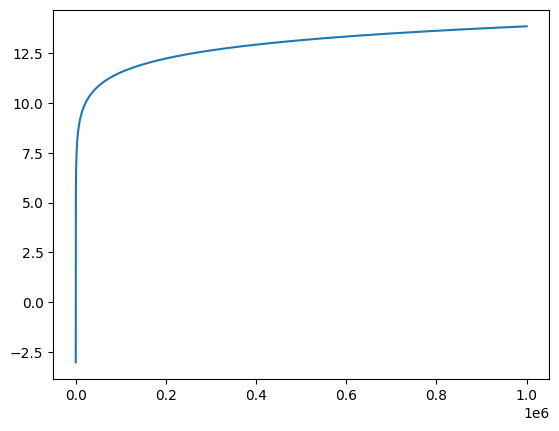

In [129]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0.05,1000000,1000000)

# plt.plot(x,np.exp(x), label='exp(x)')
# plt.plot(x,1/x, label='1/x')
plt.plot(x,np.log(x), label='ln(x)')
ax=plt.gca()


In [ ]:
# 黎曼积求积分
from sympy import *
x,n,i= symbols('x n i', real=True, positive=True)
a=1
b=3
dx=(b-a)/n
x_i=a+i*dx # ⚠️ i
f=1/x_i
expr=Sum(f*dx,(i,a,n)).doit()
expr.evalf(subs={n:10000000})

  n              
_____            
╲                
 ╲               
  ╲        2     
   ╲  ───────────
   ╱    ⎛2⋅i    ⎞
  ╱   n⋅⎜─── + 1⎟
 ╱      ⎝ n     ⎠
╱                
‾‾‾‾‾            
i = 1            


1.09861222200145

In [126]:
integrate(1/x, (x, 1, 3)).evalf(),ln(3).evalf()

(1.09861228866811, 1.09861228866811)

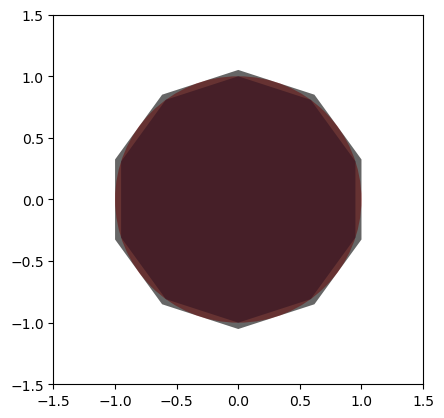

In [ ]:
# 内接和外切正多边形,近似圆
fig,ax=plt.subplots()
n=10
r=1
inner=RegularPolygon((0,0),radius=r,numVertices=n,alpha=0.7)
angle=np.pi/n
out_r=np.divide(r,np.cos(angle))
out=RegularPolygon((0,0),radius=out_r,numVertices=n,alpha=0.6,facecolor='black')
circle=Circle((0,0),radius=r,alpha=0.5,facecolor='red')
ax.add_patch(inner)
ax.add_patch(circle)
ax.add_patch(out)
ax.set_xlim(-1.5*r,1.5*r)
ax.set_ylim(-1.5*r,1.5*r)
ax.set_aspect('equal')

### 微分
1. 泰勒多项式

2. 导数/微分

3. 微分的运算
    - 加减法
    - 乘法
    - 除法
    - 复合函数
    - 反函数求导
    > 函数微分$dy=f(x)^\prime*dy$与y=x对称关系

    $e^x$的导数推导(利用反函数方式)


4. 隐函数导数

5. 参数方程的导数

6. 高阶导数

7. 中值定理
    - 费马引理
    - 罗尔中值定理
    - 拉格朗日中值定理
    - 柯西中值定理
8. 微分与近似值计算
9. 微分应用
    - 极值的运算
    - 函数的凹凸性
    - 反曲点

### 积分
1. 黎曼积

2. 积分的定理

3. 不定积分运算

4. 定积分

5. 微积分第一定理/微积分第二定理

6. 积分的应用
    - 求面积
    - 求体积
    - 概率里的应用

泰勒多项式推导以a为参考点的推导->以0为参考点的推导

In [3]:
expr=sqrt(25-x**2)
expr.diff(x)

-x/sqrt(25 - x**2)

In [15]:
expr=x**3+2*x**2+3*x+4
d=(x-1)
expr
quotient,remainder=div(expr,d)
quotient*d+remainder

(x - 1)*(x**2 + 3*x + 6) + 10

In [16]:
div(quotient,d)

(x + 4, 10)